<a href="https://colab.research.google.com/github/HS116/Mini-Finance-Webscraping-and-Analysis-Project/blob/main/Mini_Finance_Webscraping_and_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Part

##Imports

In [ ]:
import pandas_datareader
import pandas as pd
import numpy as np
import datetime as dt

from pandas_datareader import data as pdr
import plotly.offline as plo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#earlier had to update pandas Datereader to 0.10, and make sure to restart runtime after upgrading pandas_datareader
#!pip install --upgrade pandas_datareader
#same issue for plotly
#!pip install plotly --upgrade
print(pandas_datareader.__version__)
#Plotly not working atm, hence I've commented out below lines
#plo.init_notebook_mode(connected = True)
#pd.options.plotting.backend = 'plotly'

0.10.0


##Focus on recent data

In [ ]:
start = dt.datetime(2021,1,1)
end = dt.datetime.now()

## (DAX) Stocks

In [ ]:
stockCodes = {"Allianz" : "ALV", "Daimler" : "DTG", "Siemens" : "SIE", "BMW" : "BMW"}

#german stocks end in DE
stocks = [ stockCode + ".DE" for stockCode in stockCodes.values()]
stocks

['ALV.DE', 'DTG.DE', 'SIE.DE', 'BMW.DE']

##Using Pandas API to retrieve Yahoo Finance data

In [ ]:
df = pdr.get_data_yahoo(stocks, start, end)
df.head()

Attributes   Adj Close                                     Close         \
Symbols         ALV.DE DTG.DE      SIE.DE     BMW.DE      ALV.DE DTG.DE   
Date                                                                      
2021-01-04  190.011627    NaN  111.424843  68.613251  198.619995    NaN   
2021-01-05  188.060059    NaN  111.197472  67.658432  196.580002    NaN   
2021-01-06  197.837112    NaN  115.460457  67.782555  206.800003    NaN   
2021-01-07  196.210800    NaN  117.752998  67.811195  205.100006    NaN   
2021-01-08  196.832611    NaN  117.468796  67.305145  205.750000    NaN   

Attributes                               High         ...         Low  \
Symbols         SIE.DE     BMW.DE      ALV.DE DTG.DE  ...      SIE.DE   
Date                                                  ...               
2021-01-04  117.620003  71.860001  202.699997    NaN  ...  116.680000   
2021-01-05  117.379997  70.860001  199.839996    NaN  ...  116.300003   
2021-01-06  121.879997  70.989998  207.850006    NaN  ...  117.300003   
2021-01-07  124.300003  71.019997  208.350006    NaN  ...  121.900002   
2021-01-08  124.000000  70.489998  207.000000    NaN  ...  123.680000   

Attributes                   Open                                   Volume  \
Symbols        BMW.DE      ALV.DE DTG.DE      SIE.DE     BMW.DE     ALV.DE   
Date                                                                         
2021-01-04  71.230003  202.550003    NaN  118.879997  73.029999  1176585.0   
2021-01-05  70.349998  197.559998    NaN  116.519997  71.000000  1053943.0   
2021-01-06  70.489998  198.979996    NaN  117.680000  71.419998  1984656.0   
2021-01-07  70.010002  207.899994    NaN  122.160004  71.129997  1052876.0   
2021-01-08  69.639999  206.550003    NaN  124.599998  71.959999   938809.0   

Attributes                               
Symbols    DTG.DE     SIE.DE     BMW.DE  
Date                                     
2021-01-04    NaN  1257386.0  1250834.0  
2021-01-05    NaN  1355886.0  1542690.0  
2021-01-06    NaN  2048105.0  1679300.0  
2021-01-07    NaN  2215688.0  2156329.0  
2021-01-08    NaN  1823416.0  2128156.0  

[5 rows x 24 columns]

##Simplifying data by column and date

In [ ]:
print(df.Close.loc["2021-12-30":"2022-01-10"])

Symbols         ALV.DE     DTG.DE      SIE.DE     BMW.DE
Date                                                    
2021-12-30  207.649994  32.290001  152.679993  88.489998
2022-01-03  209.850006  32.000000  153.720001  91.330002
2022-01-04  215.850006  32.000000  155.419998  94.190002
2022-01-05  216.750000  32.529999  157.960007  96.239998
2022-01-06  220.000000  32.000000  154.160004  96.220001
2022-01-07  222.550003  32.209999  152.160004  95.599998
2022-01-10  223.399994  33.490002  147.880005  97.199997


##Basic stats

In [ ]:
df.Close.describe()

Symbols,ALV.DE,DTG.DE,SIE.DE,BMW.DE
count,323.000000,82.000000,323.000000,323.000000
mean,207.550093,29.500610,137.925201,84.190836
std,10.380787,3.858448,8.283143,7.657123
min,183.220001,22.035000,113.220001,68.339996
25%,198.910004,25.192500,133.230003,79.055000
50%,207.449997,31.450000,137.839996,85.070000
75%,216.075005,32.386251,142.600006,89.760002
max,231.949997,35.439999,157.960007,99.320000


In [ ]:
df.Volume.describe()

Symbols,ALV.DE,DTG.DE,SIE.DE,BMW.DE
count,3.230000e+02,8.200000e+01,3.230000e+02,3.230000e+02
mean,1.037663e+06,2.867391e+06,1.580178e+06,1.448599e+06
std,5.835227e+05,3.542365e+06,8.686682e+05,6.920965e+05
min,0.000000e+00,5.469630e+05,0.000000e+00,0.000000e+00
25%,6.926680e+05,1.429257e+06,1.096732e+06,1.016621e+06
50%,9.006530e+05,2.169632e+06,1.347564e+06,1.304012e+06
75%,1.143346e+06,3.022663e+06,1.758036e+06,1.637355e+06
max,5.205191e+06,3.059077e+07,8.044888e+06,4.996797e+06


##Basic plotting using matplotlib

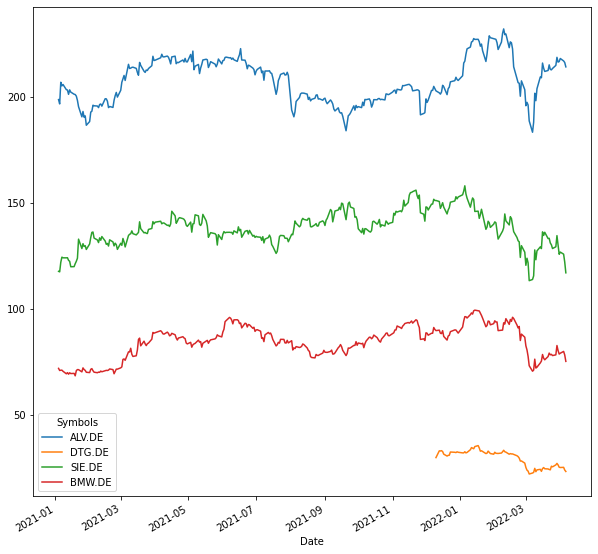

In [ ]:
#without plotly, very basic, not interactive
df.Close.plot(figsize = (10,10))

#Volatilty Project

##Calculate log returns

In [ ]:
logReturns = np.log(df.Close / df.Close.shift(1)).dropna()
logReturns

Symbols,ALV.DE,DTG.DE,SIE.DE,BMW.DE
Date,,,,
2021-12-13,-0.004697,0.101626,-0.003183,0.002451
2021-12-14,-0.002978,-0.001822,-0.021755,-0.016603
2021-12-15,0.004958,0.004549,0.008382,-0.001472
2021-12-16,0.015459,-0.013249,0.009646,0.015401
2021-12-17,-0.003170,-0.037964,-0.014099,-0.030814
...,...,...,...,...
2022-03-31,0.001155,-0.042485,-0.034108,-0.020900
2022-04-01,0.006674,-0.005166,0.008242,0.005076
2022-04-04,-0.005289,0.003182,-0.007765,0.010702


##Calculate daily + annual standard dev of returns

In [ ]:
dailyStanDev = logReturns.std()
dailyStanDev

Symbols
ALV.DE    0.017644
DTG.DE    0.031021
SIE.DE    0.026568
BMW.DE    0.025400
dtype: float64

In [ ]:
#to convert to annual stan dev, mul by sqrt(252). 252 cuz 252 trading days in 1 year.
annStanDev = dailyStanDev * np.sqrt(252)
annStanDev

Symbols
ALV.DE    0.280093
DTG.DE    0.492443
SIE.DE    0.421759
BMW.DE    0.403213
dtype: float64

In [ ]:
# as a %
vol = annStanDev * 100
vol

Symbols
ALV.DE    28.009278
DTG.DE    49.244303
SIE.DE    42.175938
BMW.DE    40.321270
dtype: float64

##Plotting

In [ ]:
fig = make_subplots(rows = 2, cols = 2)
chart1 = go.Histogram(x = logReturns["ALV.DE"], name = "Allianz")
chart2 = go.Histogram(x = logReturns["DTG.DE"], name = "Daimler")
chart3 = go.Histogram(x = logReturns["SIE.DE"], name = "Siemens")
chart4 = go.Histogram(x = logReturns["BMW.DE"], name = "BMW")

fig.append_trace(chart1, 1, 1)
fig.append_trace(chart2, 1, 2)
fig.append_trace(chart3, 2, 1)
fig.append_trace(chart4, 2, 2)

fig.update_layout(autosize = False, width = 600, height = 600, title = "Log Returns")

fig.show()
